<a href="https://colab.research.google.com/github/phonism/notes/blob/master/Machine_Learning_Coding_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kmeans
K-means clustering is an unsupervised machine learning algorithm that seeks to segment a dataset into groups based on the similarity of datapoints.

The kMeans algorithm finds those k points (called centroids) that minimize the sum of squared errors.

Thus, the Kmeans algorithm consists of the following steps:
+ We initialize k centroids randomly.
+ Then we calcuate the distance from each point to each centroid.
+ Assign each point to their nearest centroid.
+ Centroids are shifted to be the average value of the points belonging to it.If the centroids did not move, the algorithm is finished, else repeat.


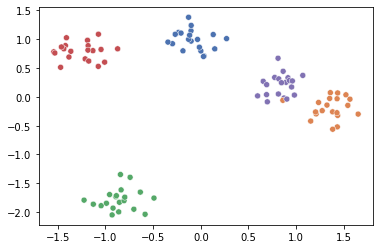

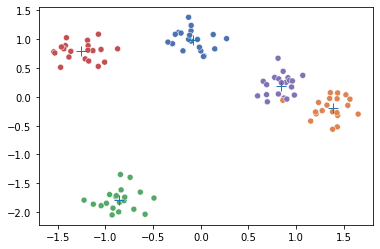

In [ ]:
import numpy as np
from numpy.random import uniform
import random
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="deep",
    legend=None)
plt.show()

def euclidean(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

class KMeans(object):
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters

    def fit(self, x):
        min_val = np.min(x, axis=0)
        max_val = np.min(x, axis=0)
        self.centroids = np.array([random.choice(x) for _ in range(self.n_clusters)])
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < 300:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for p in x:
                dists = euclidean(p, self.centroids)
                sorted_points[np.argmin(dists)].append(p)
            new_centroids = []
            for cluster in sorted_points:
                if len(cluster) > 0:
                    new_centroids.append(np.mean(cluster, axis=0))
                else:
                    new_centroids.append(np.array([0, 0]))
            prev_centroids = self.centroids
            self.centroids = np.array(new_centroids)

kmeans = KMeans(n_clusters=centers)

x = np.random.rand(1000, 2)
kmeans.fit(X_train)

sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="deep",
    legend=None)

plt.plot(
    [x for x, _ in kmeans.centroids],
    [y for _, y in kmeans.centroids],
    '+',
    markersize=10)
plt.show()

## K-nearest Neighbors (KNN)
The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

+ Initialize K to your chosen number of neighbors
+ For each example in the data
    + Calculate the distance between the query example and the current example from the data.
    + Add the distance and the index of the example to an ordered collection
+ Sort the ordered collection of distances
 and indices from smallest to largest (in ascending order) by the distances
+ Pick the first K entries from the sorted collection
+ Get the labels of the selected K entries
+ If regression, return the mean of the K labels
+ If classification, return the mode of the K labels

In [ ]:
import numpy as np

class KNN(object):
    def __init__(self):
        pass

    def euclidean(self, q, x):
        # l2
        return np.sqrt(np.sum((q - x) ** 2, axis=1))

    def manhattan(self, q, x):
         |x1 - x2| + |y1 - y2|.
    
    def mode(self, x):
        vals, counts = np.unique(x, return_counts=True)
        return vals[np.argmax(counts)]

    def fit(self, x, y, query, k):
        dist = self.euclidean(q, x)
        dist_with_index = sorted([(dist[idx], idx) for idx in range(len(dist))])
        return self.mode([y[idx] for val, idx in dist_with_index[:k]])

knn = KNN()

n = 100
x = np.random.rand(n, 2)
y = np.random.randint(2, size=n)
q = np.random.rand(1, 2)

print(knn.fit(x, y, q, 9))

1


## **Linear Regression**
### Introduction
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).

The main type of linear regression is 
$$f(x)=w_{1}x1 + w_{2}x2 + w_{3}x3 + b$$
which $w$ represents the weights, our model will try to learn. The variables $x1, x2,x3$ represent the input data's attributes. The variable $y$ represents our prediction.

### **Making Predictions**
Let's say our predict function outputs an estimate of ctr(click-through rate)  given our current weights and some attributes $x1,x2,x3$. 
```python
def forward(self, x):
    y_pred = np.matmul(x, self.w) + self.b
    return y_pred
```
### **Cost Function**
Now we need a cost function to audit how our model is performing. We use MSE function. 
$$MSE=\frac{1}{2n}\sum_{i=1}^{n}(y_i - (w_{1}x1_{i} + w_{2}x2_{i}+w_{3}x3_{i} + b))^2$$
Our model will try to identify weight values that most reduce our cost function.
```python
def cost_function(self, x, y_true):
    n = len(y_true)
    y_pred = self.forward(x)
    sq_error = (y_pred - y_true) ** 2
    return 1.0 / (2 * n) * sq_error.sum()
```

### **Gradient Descent**
To minimize MSE we use Gradient Descent to calculate the gradient of our cost function. Gradient descent consists of looking at the error that our weight currently gives us, using the derivative of the cost function to find the gradient (The slope of the cost function using our current weight), and then changing our weight to move in the direction opposite of the gradient. We need to move in the opposite direction of the gradient since the gradient points up the slope instead of down it, so we move in the opposite direction to try to decrease our error.

Again using the Chain rule we can compute the gradient vector of partial derivatives describing the slope of the cost function for each weight.
$$f^{'}(w_{1}) = -x1(y - (w_{1}x1 + w_{2}x2 + w_{3}x3 + b)$$
$$f^{'}(w_{2}) = -x2(y - (w_{1}x1 + w_{2}x2 + w_{3}x3 + b)$$
$$f^{'}(w_{3}) = -x3(y - (w_{1}x1 + w_{2}x2 + w_{3}x3 + b)$$
```python
def compute_gradients(self, x, y_true):
    y_pred = self.forward(x)
    difference = y_pred - y_true
    gradient_b = np.mean(difference)
    gradients_w = np.matmul(x.transpose(), difference)
    gradients_w = np.array([np.mean(grad) for grad in gradients_w])
```

### **Train**
Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost.
```python
def __init__(self):
    self.w = np.random.rand(feature_num)
    self.b = np.random.rand(1)

def update_weightes(self, x, y_true, learning_rate):
    gradients_w, gradient_b = self.compute_gradients(x, y_true)
    self.w = self.w - learning_rate * gradients_w
    self.b = self.b - learning_rate * gradient_b

def train(self, x, y):
    epoch_num = 1000
    learning_rate = 0.01
    for epoch in range(epoch_num):
        model.update_weightes(x, y, learning_rate)
```

### **Normalize**
As the number of features grows, calculating gradient takes longer to compute, and the gradient may be very huge and we may meet some overflow err. We can speed this up by “normalizing” our input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Our goal now will be to normalize our features so they are all in the range -1 to 1.
```python
def normalize(self, x):
    for feature in x.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return x
```

In [ ]:
import numpy as np

feature_num = 3

class LinearRegression(object):
    def __init__(self):
        self.w = np.random.rand(feature_num)
        self.b = np.random.rand(1)

    def forward(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred
    
    def normalize(self, x):
        for feature in x.T:
            fmean = np.mean(feature)
            frange = np.amax(feature) - np.amin(feature)
            feature -= fmean
            feature /= frange
        return x

    def cost_function(self, x, y_true):
        n = len(y_true)
        y_pred = self.forward(x)
        sq_error = (y_pred - y_true) ** 2
        return 1.0 / (2 * n) * sq_error.sum()
    
    def compute_gradients(self, x, y_true):
        y_pred = self.forward(x)
        difference = y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b
    
    def update_weightes(self, x, y_true, learning_rate):
        gradients_w, gradient_b = self.compute_gradients(x, y_true)
        self.w = self.w - learning_rate * gradients_w
        self.b = self.b - learning_rate * gradient_b
    
    def train(self, x, y):
        epoch_num = 1000
        learning_rate = 0.01
        for epoch in range(epoch_num):
            model.update_weightes(x, y, learning_rate)

model = LinearRegression()

N = 1000
# y = 1 * x1 - 2 * x2 + 3 * x3 + 12
def gen_data(x):
    y = []
    for i in range(N):
        y.append(x[i][0] - 2 * x[i][1] + 3 * x[i][2] + 12)
    return np.array(y)

x = np.random.rand(N, 3)
y = gen_data(x)

x = model.normalize(x)
model.train(x, y)
print(model.w, model.b)

[ 0.99828682 -1.99113219  2.99342082] [-268782.10094641]


## Logistic Regression
### Introduction
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.
 
### **Sigmoid Function**
In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.
$$Sigmoid(x) = \frac{1}{1 + e^{-x}}$$
```python
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))
```

### **Cost Function**
Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for $y=1$ and one for $y=0$.
$$L = \frac{1}{m}(-y^{T}log(y\_pred) - (1-y)^{T}log(1-y\_pred))$$

In [ ]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

class LogisticRegression(object):
    def __init__(self):
        self.w = np.random.rand(feature_num)
        self.b = np.random.rand(1)
    
    def forward(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        y_pred = sigmoid(y_pred)
        return y_pred
    
    def normalize(self, x):
        for feature in x.T:
            fmean = np.mean(feature)
            frange = np.amax(feature) - np.amin(feature)
            feature -= fmean
            feature /= frange
        return x

    def cross_entropy(self, x, y_true):
        m = len(y_true)
        y_pred = self.forward(x)
        class1_cost = -y_true * np.log(y_pred)
        class2_cost = (1 - y_true) * np.log(1 - y_pred)
        cost = class1_cost - class2_cost
        cost = cost.sum() / m
        return cost
    
    def compute_gradients(self, x, y_true):
        y_pred = self.forward(x)
        difference = y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b
    
    def update_weightes(self, x, y_true, learning_rate):
        gradients_w, gradient_b = self.compute_gradients(x, y_true)
        self.w = self.w - learning_rate * gradients_w
        self.b = self.b - learning_rate * gradient_b
    
    def train(self, x, y):
        epoch_num = 1000
        learning_rate = 0.01
        for epoch in range(epoch_num):
            model.update_weightes(x, y, learning_rate)
    
    def predict(self, x, y):
        print(y)
        print(self.forward(x))

model = LogisticRegression()

N = 1000
# y = 1 * x1 - 2 * x2 + 3 * x3 - 1
def gen_data(x):
    y = []
    for i in range(N):
        y_true = x[i][0] - 2 * x[i][1] + 3 * x[i][2] - 1
        if y_true > 0:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

x = np.random.rand(N, 3)
y = gen_data(x)

x = model.normalize(x)
model.train(x, y)
print(model.w, model.b)
model.predict(x[:10], y[:10])

[ 10.44756978 -20.78139095  31.64716938] [0.53287193]
[0 0 1 0 0 1 1 1 1 1]
[5.48030739e-01 1.92401937e-05 1.00000000e+00 8.33032784e-02
 3.62622457e-10 9.99999998e-01 9.99941493e-01 9.99862098e-01
 9.99999097e-01 9.99970778e-01]


## Decision trees
Tree-based methods are simple and useful for interpretation since the underlying mechanisms are considered quite similar to human decision-making.

The methods involve stratifying or segmenting the predictor space into a number of simpler regions. When making a prediction, we simply use the mean or mode of the region the new observation belongs to as a response value.

Decision trees can be used for both regression and classification tasks.

+ Dividing the predictor space into several distinct, non-overlapping regions
    + In order to split the predictor space into distinct regions, we use binary recursive splitting, which grows our decision tree until we reach a stopping criterion. Since we need a reasonable way to decide which splits are useful and which are not, we also need a metric for evaluation purposes.
    + We can leverage the concept of entropy to calculate the information gain, resulting from a possible split. 
$$H(X)=-\sum_{i=1}^{n}P(x_i)logP(x_i)$$
+ Predicting the most-common class label for the region any new observation belongs to

### training
The main algorithm can be basically divided into three steps:

+ Initialization of parameters (e.g. maximum depth, minimum samples per split) and creation of a helper class
+ Building the decision tree, involving binary recursive splitting, evaluating each possible split at the current stage, and continuing to grow the tree until a stopping criterion is satisfied
+ Making a prediction, which can be described as traversing the tree recursively and returning the most-common class label as a response value


In [ ]:
import numpy as np

class Node(object):
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        return self.value is not None

class DecisionTree(object):
    def __init__(self, max_depth=10, min_samples_split=2, impurity_func="entory"):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.imurity_func = impurity_func
        self.root = None

    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False
    
    def entropy(self, y):
        proportions = np.bincount(y) / len(y)
        ans = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return ans
    
    def gini(self, y):
        proportions = np.bincount(y) / len(y)
        ans = 1 - np.sum([p ** 2 for p in proportions])
        return ans
    
    def clac_impurity(self, y, func="entropy"):
        if func == "entropy":
            return self.entropy(y)
        else:
            return self.gini(y)
    
    def create_split(self, x, thresh):
        left_idx = np.argwhere(x < thresh).flatten()
        right_idx = np.argwhere(x > thresh).flatten()
        return left_idx, right_idx
    
    def information_gain(self, x, y, thresh):
        # Therefore, we are interested in comparing those cuts that generate less impurity. 
        # For this, Information Gain is used. 
        # This metric indicates the improvement when making different partitions 
        # and is usually used with entropy
        parent_loss = self.clac_impurity(y, self.imurity_func)
        left_idx, right_idx = self.create_split(x, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)
        if n_left == 0 or n_right == 0:
            return 0

        child_loss = (n_left / n) * self.clac_impurity(y[left_idx], self.imurity_func) \
            + (n_right / n) * self.clac_impurity(y[right_idx], self.imurity_func)
        return parent_loss - child_loss
    
    def best_split(self, x, y, features):
        # we will stick with the split that generates the highest Information Gain.
        split = {"score": -1, "feat": None, "thresh": None}

        # the cost function of a decision tree seeks to find those cuts that minimize impurity
        for feature in features:
            X_feat = x[:, feature]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self.information_gain(X_feat, y, thresh)
                if score > split["score"]:
                    split["score"] = score
                    split["feat"] = feature
                    split["thresh"] = thresh
        return split["feat"], split["thresh"]
    
    def build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        rand_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self.best_split(X, y, rand_feats)

        left_idx, right_idx = self.create_split(X[:, best_feat], best_thresh)
        left_child = self.build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self.build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)
    
    def traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self.build_tree(X, y)
    
    def predict(self, X):
        predictions = [self.traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

from sklearn import datasets
from sklearn.model_selection import train_test_split
    
data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

def accuracy(y_true, y_pred):
    ans = np.sum(y_true == y_pred) / len(y_true)
    return ans

tree = DecisionTree(max_depth=10, min_samples_split=3, impurity_func="gini")
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy(y_test, y_pred)

print("gini Accuracy:", acc)

tree = DecisionTree(max_depth=10, min_samples_split=3, impurity_func="entropy")
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy(y_test, y_pred)

print("entropy Accuracy:", acc)

gini Accuracy: 0.9385964912280702
entropy Accuracy: 0.9385964912280702


## Other Tree Model based on Decision Tree

### Some Basic Concept
+ **Bias** is the simplifying assumptions made by the model to make the target function easier to approximate.
+ **Variance** is the amount that the estimate of the target function will change given different training data.

### Random Forest
Random forest is an ensemble learning method, which tries to build a multitude of decision tree (CART) models to predict the target variable. It builds many decision trees with random sample and decision variables. If used for regression purposes, it outputs the mean of all the decision trees. In case of a classification problem, the mode of the outputs of the decision trees is the final output.

### Bagging
Bagging refers to Bootstrap Aggregation, which is the technique used to reduce the variance of decision tree models. In the Bagging algorithm, several subsets of the data are randomly chosen with replacement and are fed into separate decision tree models, creating an ensemble of decision tree models. The output is the average of the predictions made by all the decision trees, making it more robust and reducing the variance.

### Boosting
The idea behind boosting is to create a ‘powerful’ committee of many weak classifiers. Here, samples are collected from the training data without replacement and are fed into the tree models. The point to note here is that this sampling is not parallel, it is done sequentially; and in each step, more weightage is given to the wrongly classified labels. The final output is the weighted majority vote of all the models trained in this ensemble learning technique. The main aim of the boosting algorithm is to increase the predictive accuracy of the weak classifiers.

### XGboost
XGBoost is an optimized Gradient Boosting Machine Learning library...

## Glossary
[https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html](https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html)

+ **Normal Distribution:**
    + The Normal Distribution is probably the most important and commonly-encountered probability distribution.
    + In a normal distribution, 68% of data is within one σ from μ and 95% of data is within two σ.
    + It is “convenient” to operate on normal distributions. Many intractable problems can now be solved analytically. And many operations on normal distributions return a normal distribution.
    + One of the convenience is that when we multiply two normal distributions, its result is just another normal distribution scaled by a factor s
    + its summation is also normally distributed.


# Layers
## Dropout
A dropout layer takes the output of the previous layer’s activations and randomly sets a certain fraction (dropout rate) of the activatons to 0, cancelling or ‘dropping’ them out.

Dropout is only used during training; At test time, no activations are dropped, but scaled down by a factor of dropout rate. This is to account for more units being active during test time than training time.

+ A layer in a neural net outputs a tensor (matrix) A of shape (batch_size, num_features).
+ The dropout rate of the layer is set to 0.5 (50%).
+ A random 50% of the values in A will be set to 0.
+ These will then be multiplied with the weight matrix to form the inputs to the next layer.


```python
layer_output *= np.random.randint(0, high=2, size=layer_output.shape) # dropping out values

# scaling up by dropout rate during TRAINING time, so no scaling needs to be done at test time
layer_output /= 0.5
```

## Gradient Desent

## [Adam](https://machinelearningmastery.com/adam-optimization-from-scratch)
> **TODO**: 先实现一个basic dnn，可以使用手写数字的例子，然后把所有的basic tech都用上。all from scratch

The Adaptive Movement Estimation algorithm, or Adam for short, is an extension to gradient descent and a natural successor to techniques like AdaGrad and RMSProp that automatically adapts a learning rate for each input variable for the objective function and further smooths the search process by using an exponentially decreasing moving average of the gradient to make updates to variables.
+ Gradient descent is an optimization algorithm that uses the gradient of the objective function to navigate the search space.
+ Gradient descent can be updated to use an automatically adaptive step size for each input variable using a decaying average of partial derivatives, called Adam.
+ How to implement the Adam optimization algorithm from scratch and apply it to an objective function and evaluate the results.



In [ ]:
import numpy as np

class DeepNeuralNetwork(object):
    def __init__(self):
        self.input_layer_size = 128
        self.hidden_layer_size = 256
        self.output_layer_size = 2
        self.init_weights()
        self.init_bias()
    
    def init_weights(self):
        self.w1 = np.random.randn(self.input_layer_size, self.hidden_layer_size) * \
                np.sqrt(2.0 / self.input_layer_size)
        self.w2 = np.random.randn(self.hidden_layer_size, self.output_layer_size) * \
                np.sqrt(2.0 / self.hidden_layer_size)
    
    def init_bias(self):
        self.b1 = np.full((1, self.hidden_layer_size), 0.1)
        self.b2 = np.full((1, self.output_layer_size), 0.1)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_prime(self, x):
        x[x < 0] = 0
        x[x > 0] = 1
        return x
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
         # Hidden layer
        x = np.dot(x, self.w1) + self.b1
        x = self.relu(x)

        # Output layer
        x = np.dot(x, self.w2) + self.b2
        x = self.relu(x)
        return x
    
    def backprop(self, x, y):
        """
        反向传播的本质是利用chain rule求解整个function对w的导数
        """
        y_pred = self.forward(x)
        d = (y_pred - y) * self.relu_prime(y_pred)
        print(loss)

dnn = DeepNeuralNetwork()
x = np.random.randn(dnn.input_layer_size)
y = np.array([1, 0])
print(dnn.forward(x))
dnn.backprop(x, y)


[[0.75108166 0.        ]]


NameError: ignored

# TF-IDF (Term Frequency-Inverse Document Frequency)
IDF =Log[(Number of documents) / (Number of documents containing the word)]

TF = (Number of repetitions of word in a document) / (# of words in a document)

TF-IDF = TF * IDF

we can get the TF-IDF matrix for each word in each document. And words TF-IDF vector represents a document. We could use cosine of the vectors to represent the similarity between docments.

# Language Model
Language modeling is the task of predicting what word comes next.

## N-gram language model
## Word2vec
Skip-gram is used to predict the context word for a given target word. On the other hand, the cbow model predicts the target word according to its context. The context is represented as a bag of the words contained in a fixed size window around the target word.

## Attention

# Normalization
## Batch Normalization
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. 
+ Probably Use Before the Activation
+ Use Large Learning Rates
+ Less Sensitive to Weight Initialization
+ Don’t Use With Dropout

how do we use batch norm in testing?
+ use train's statistics

## Layer Normalization
Layer Normalization directly estimates the normalization statistics from the summed inputs to the neurons within a hidden layer so the normalization does not introduce any new dependencies between training cases.


# Transformer
## Self-attention
$$q^{i} = w^{q}a^{i}$$
$$k^{i} = w^{k}a^{i}$$
$$v^{i} = w^{v}a^{i}$$
$$\sum_{i}softmax(\alpha_{1,i}=q^{1}*k^{i})v^{i}$$
Every input must have three representations called key, query, and value. To obtain these representations, every input is multiplied with a set of weights for keys, a set of weights for querys, and a set of weights for values.

To obtain attention scores, we start with taking a scaled dot product between each input's query with all keys, including itself. Then take the softmax across these attention scores.

The softmaxed attention scores for each input is multiplied by its value representations then we get the weighted values. 

For each input take all the weighted values and sum them element-wise.

The dimension of query and key must always be the same because of the dot product score function. However, the dimension of value may be different from query and key. The resulting output will consequently follow the dimension of value.

## Multi-Head self-attention
with multi-headed attention we have not only one, but multiple sets of Query/Key/Value weight matrices (the Transformer uses eight attention heads, so we end up with eight sets for each encoder/decoder). Each of these sets is randomly initialized. Then, after training, each set is used to project the input embeddings (or vectors from lower encoders/decoders) into a different representation subspace.

## position encoding
To address this, the transformer adds a vector to each input embedding. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word, or the distance between different words in the sequence. The intuition here is that adding these values to the embeddings provides meaningful distances between the embedding vectors once they’re projected into Q/K/V vectors and during dot-product attention.

## The Residuals
each sub-layer (self-attention, ffnn) in each encoder has a residual connection around it, and is followed by a layer-normalization step.
![image.png](https://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png)

## Feed Forward Neural Netword

## The Decoder Side
The encoder start by processing the input sequence. The output of the top encoder is then transformed into a set of attention vectors K and V. These are to be used by each decoder in its “encoder-decoder attention” layer which helps the decoder focus on appropriate places in the input sequence.

The following steps repeat the process until a special symbol is reached indicating the transformer decoder has completed its output. The output of each step is fed to the bottom decoder in the next time step, and the decoders bubble up their decoding results just like the encoders did. And just like we did with the encoder inputs, we embed and add positional encoding to those decoder inputs to indicate the position of each word.

In the decoder, the self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to -inf) before the softmax step in the self-attention calculation.

The "Encoder-Decoder Attention" layer works just like multiheaded self-attention, except it creates its Queries matrix from the layer below it, and takes the Keys and Values matrix from the output of the encoder stack.

![image2.png](https://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png)

## The Final Linear and Softmax Layer
The decoder stack outputs a vector of floats. How do we turn that into a word? That’s the job of the final Linear layer which is followed by a Softmax Layer.

The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector.

The softmax layer then turns those scores into probabilities (all positive, all add up to 1.0). The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.

## The Loss Function
cross-entropy


## Follow Up 1: What are masks in transfomer?:
there are two marks
+ padding mask: for the indefinite length
+ sequence mask: self-attention will use the other words' context it will see the output in some case. so in decoder the self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to -inf) before the softmax step in the self-attention calculation.

## Follow Up 2: Why transformer use multi-head?
Multi-headed attention was introduced due to the observation that different words relate to each other in different ways. For a given word, the other words in the sentence could act as moderating or negating the meaning, but they could also express relations like inheritance (is a kind of), possession (belongs to), etc. 

This means that separate sections of the Embedding can learn different aspects of the meanings of each word, as it relates to other words in the sequence.

## Follow Up 3: Why we need scaled before softmax in self-attention?
Beacuse the dot product between key and query will be huge. The gradient of the softmax will be small, so we divide the scores by 8 (the square root of the dimension of the key vectors used in the paper – 64). why dk. If the q and k are independent random variable with mean 0, variance 1. The dot production of q and k has mean 0 and variance dk.

## Follow up 4: What is the role of feed forward layer in Transformer?
$$max(0, XW_{1} + b_{1})W_{2} + b_{2}$$
The feed-forward layer is weights that is trained during training and the exact same matrix is applied to each respective token position.

Since it is applied without any communcation with or inference by other token positions it is a highly parallelizable part of the model.

The role and purpose is to process the output from one attention layer in a way to better fit the input for the next attention layer.

### Follow up 5: Why transformer use layer-norm?
Layer Normalization directly estimates the normalization statistics from the summed inputs to the neurons within a hidden layer so the normalization does not introduce any new dependencies between training cases.

if using batchnorm, it would be uncertain what would be the appropriate normalization constant (the total number of elements to divide by during normalization) to use. Different batches would have different normalization constants which leads to instability during the course of training

In [ ]:
import torch
import torch.nn.functional as F

x = [
  [1, 0, 1, 0], # Input 1
  [0, 2, 0, 2], # Input 2
  [1, 1, 1, 1]  # Input 3
 ]
x = torch.tensor(x, dtype=torch.float32)

w_key = [
  [0, 0, 1],
  [1, 1, 0],
  [0, 1, 0],
  [1, 1, 0]
]
w_query = [
  [1, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 1, 1]
]
w_value = [
  [0, 2, 0],
  [0, 3, 0],
  [1, 0, 3],
  [1, 1, 0]
]
w_key = torch.tensor(w_key, dtype=torch.float32)
w_query = torch.tensor(w_query, dtype=torch.float32)
w_value = torch.tensor(w_value, dtype=torch.float32)

keys = x @ w_key
querys = x @ w_query
values = x @ w_value

attn_scores = querys @ keys.T

attn_scores_softmax = F.softmax(attn_scores, dim=-1)
# For readability, approximate the above as follows
attn_scores_softmax = [
  [0.0, 0.5, 0.5],
  [0.0, 1.0, 0.0],
  [0.0, 0.9, 0.1]
]
attn_scores_softmax = torch.tensor(attn_scores_softmax)
weighted_values = values[:,None] * attn_scores_softmax.T[:,:,None]
outputs = weighted_values.sum(dim=0)
print(outputs)

tensor([[2.0000, 7.0000, 1.5000],
        [2.0000, 8.0000, 0.0000],
        [2.0000, 7.8000, 0.3000]])


# BERT
Bidirectional Encoder Representations from Transformers: BERT
+ BERT has deep bidirectional representations meaning the model learns information from left to right and from right to left. The bidirectional models are very powerful compared to either a left-to-right model or the shallow concatenation of a left-to-right and a right-to-left model. As opposed to directional models, which read the text input sequentially (left-to-right or right-to-left), the Transformer encoder reads the entire sequence of words at once. Therefore it is considered bidirectional, though it would be more accurate to say that it’s non-directional. This characteristic allows the model to learn the context of a word based on all of its surroundings (left and right of the word).
+ BERT uses the Masked Language Model (MLM) to use the left and the right context during pre-training to create a deep bidirectional Transformers.

## Masked Language Model
Before feeding word sequences into BERT, 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence. In technical terms, the prediction of the output words requires:
+ Adding a classification layer on top of the encoder output.
+ Multiplying the output vectors by the embedding matrix, transforming them into the vocabulary dimension.
+ Calculating the probability of each word in the vocabulary with softmax.

## Next Sentence Prediction
In the BERT training process, the model receives pairs of sentences as input and learns to predict if the second sentence in the pair is the subsequent sentence in the original document. During training, 50% of the inputs are a pair in which the second sentence is the subsequent sentence in the original document, while in the other 50% a random sentence from the corpus is chosen as the second sentence. The assumption is that the random sentence will be disconnected from the first sentence.
+ A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
+ A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.
+ A positional embedding is added to each token to indicate its position in the sequence. The concept and implementation of positional embedding are presented in the Transformer paper.

To predict if the second sentence is indeed connected to the first, the following steps are performed:

+ The entire input sequence goes through the Transformer model.
+ The output of the [CLS] token is transformed into a 2×1 shaped vector, using a simple classification layer (learned matrices of weights and biases).
+ Calculating the probability of IsNextSequence with softmax.

## How to use bert
BERT can be used for a wide variety of language tasks, while only adding a small layer to the core model:

+ Classification tasks such as sentiment analysis are done similarly to Next Sentence classification, by adding a classification layer on top of the Transformer output for the [CLS] token.
+ In Question Answering tasks (e.g. SQuAD v1.1), the software receives a question regarding a text sequence and is required to mark the answer in the sequence. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.
+ In Named Entity Recognition (NER), the software receives a text sequence and is required to mark the various types of entities (Person, Organization, Date, etc) that appear in the text. Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.

## Follow Up 1: There are three embeddings in BERT, what is it, why it can add?
It have 
+ token embedding: all words and two sepcial token [CLS] [SEP], [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
+ sentence embedding: A sentence embedding indicating Sentence A or Sentence B is added to each token.
+ position embedding. A positional embedding is added to each token to indicate its position in the sequence.
We add these three embeddings. Why? If we treat our input as one-hot representation, the sum of the embeddings is actually equal to the concat of these one-hot representations's embedding. And I think the idea is like the bag of the word model.

## Follow Up 2: What the bert's learning rate warm-up and why?
It means that if you specify your learning rate to be say 2e-5, then during training the learning rate will be linearly increased from approximately 0 to 2e-5 within the first 10,000 steps. After a few epoches, our learning rate will be decay.

Because the parameters of the model are extremely large, at the beginning of the training process. All parameters are random, and if the learning rate is very large, the model can easily overfit the samples.

## Follow Up 3: the loss function of the BERT?
When training the BERT model, Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies.

## Follow Up 4: How to calculate the parameter amount of bert
+ input embedding: 23 million
    + token: 30000 * 768
    + position: 512 * 768
    + sentence: 2 * 768
+ single encoder: 7 million 
    + multi-head self-attetion: 768 * 768 * 3 2 million
    + add & norm 768 * 2
    + feed forward neural network: 768 * 3072 + 3072 * 768 5 million
    + add & norm 768 * 2
+ all: input embedding + 12 * single encoder = 107 million

## Follow Up 5: How pre-trained BERT model generates word embeddings for out of vocabulary words?
Subwords are used for representing both the input text and the output tokens. When an unseen word is presented to BERT, it will be sliced into multiple subwords, even reaching character subwords if needed. That is how it deals with unseen words.

## Follow Up 6: What are the limitations of BERT?
+ Bert uses the [mask] token during training, but not in prediction, which may affect BERT's performance.
+ Only use 15% tokens per sentence. So the convergence time is greater than the left-to-right language model.
+ The bert mask only mask single word even sometime mask a subword. Lack of modeling the semantics of entities and phrases. This is what ERNIE do.

## Follow Up 7: Bert family?
+ Albert: Cross-layer Parameter Sharing
+ Roberta: Dynamic Masking, remove NSP task, larger batch size

## Follow Up 8: What is ERNIE?
The architecture of ERNIE is the same as BERT, except that it has a task embedding. And ERNIE has different pretrain tasks, such as bert only mask single word. ernie mask words, phrases, and entities. ERNIE also uses dialogue and search click log for next sentence prediction task. Finally ERNIE use a continuous, multi-task learning approach(simple as training the model in saveral stages, randomly selecting tasks for training in each stage, and the number of the tasks is gradually increased)

## Follow Up 9: What is ERNIE-ANN
ERNIE-ANN aims to learn the sentence representations for recall. The training paradigm is different from the point-wise and pair-wise. It's call matrix-wise in Baidu. May be also called in-batch negative sample. The main idea is that I don't generate the random samples by my own, I use the other samples within a batch to be the negative samples. This method will trained very fast. Based on this method, I have made a lot of improvements about the hard negtive sample mining, both online and offline.
+ offline method: the most hardest sample in the batch is still not so hard, so we need the offline mining. We first train a base model. Then build a ann index offline, and generate each sample's similar but not so similar sample as the hard sample. And we add these negative sample in the traning set.
+ online method: The online method is quite straightforward, I use the hardest sample within a batch instead of all the other samples. The hardest sample is the sample that is most similar sample to the sample within a batch. We could also add some randomly noise on the sample embedding to generate the hard sample.
In real production, we combine both approaches, the offline hard negative mining contributes the most. 

## Follow Up 10: what is ELMo?
The way ELMo works is that it uses bidirectional LSTM to make sense of the context. Since it considers words from both directions, it can assign different word embedding to words that are spelled similarly but have different meanings. This enables ELMo to capture contextual information from the sequences but since ELMo uses LTSM it does not have long-term dependency compared to transformers.

## Follow Up 11: what is GPT?
GPT is use decoders from the transformer instead of encoders in a unidirectional approach. The pretrain task is left-to-right language model task. Predict next token.

## Follow Up 12: Can BERT be used for sentence generating tasks?
Sentence generation requires sampling from a language model, which gives the probability distribution of the next word given previous contexts. But BERT can't do this due to its bidirectional nature.

## Follow Up 13: why we need position emebedding?
We all know that in languages the order of the words and their position in a sentence really matters. The meaning of the entire sentence can change if the words are re-ordered. When implementing NLP solutions, the recurrent neural networks have an inbuilt mechanism that deals with the order of sequences. The transformer model, however, does not use recurrence or convolution and treats each data point as independent of the other. Hence, positional information is added to the model explicitly to retain the information regarding the order of words in a sentence. Positional encoding is the scheme through which the knowledge of order of objects in a sequence is maintained.


In [ ]:
import math
import re
from random import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class Embedding(nn.Module):
    def __init__(self):
        super(Embedding, self).__init__()
        self.tok_embed = nn.Embedding(vocab_size, d_model)  # token embedding
        self.pos_embed = nn.Embedding(maxlen, d_model)  # position embedding
        self.seg_embed = nn.Embedding(n_segments, d_model)  # segment(token type) embedding
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x, seg):
        seq_len = x.size(1)
        pos = torch.arange(seq_len, dtype=torch.long)
        pos = pos.unsqueeze(0).expand_as(x)  # (seq_len,) -> (batch_size, seq_len)
        embedding = self.tok_embed(x) + self.pos_embed(pos) + self.seg_embed(seg)
        return self.norm(embedding)

class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn 

class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = nn.Linear(n_heads * d_v, d_model)(context)
        return nn.LayerNorm(d_model)(output + residual), attn # output: [batch_size x len_q x d_model]

class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        # (batch_size, len_seq, d_model) -> (batch_size, len_seq, d_ff) -> (batch_size, len_seq, d_model)
        return self.fc2(gelu(self.fc1(x)))

class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

class BERT(nn.Module):
    def __init__(self):
        super(BERT, self).__init__()
        self.embedding = Embedding()
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])
        self.fc = nn.Linear(d_model, d_model)
        self.activ1 = nn.Tanh()
        self.linear = nn.Linear(d_model, d_model)
        self.activ2 = gelu
        self.norm = nn.LayerNorm(d_model)
        self.classifier = nn.Linear(d_model, 2)
        # decoder is shared with embedding layer
        embed_weight = self.embedding.tok_embed.weight
        n_vocab, n_dim = embed_weight.size()
        self.decoder = nn.Linear(n_dim, n_vocab, bias=False)
        self.decoder.weight = embed_weight
        self.decoder_bias = nn.Parameter(torch.zeros(n_vocab))

    def forward(self, input_ids, segment_ids, masked_pos):
        output = self.embedding(input_ids, segment_ids)
        enc_self_attn_mask = get_attn_pad_mask(input_ids, input_ids)
        for layer in self.layers:
            output, enc_self_attn = layer(output, enc_self_attn_mask)
        # output : [batch_size, len, d_model], attn : [batch_size, n_heads, d_mode, d_model]
        # it will be decided by first token(CLS)
        h_pooled = self.activ1(self.fc(output[:, 0])) # [batch_size, d_model]
        logits_clsf = self.classifier(h_pooled) # [batch_size, 2]

        masked_pos = masked_pos[:, :, None].expand(-1, -1, output.size(-1)) # [batch_size, max_pred, d_model]
        # get masked position from final output of transformer.
        h_masked = torch.gather(output, 1, masked_pos) # masking position [batch_size, max_pred, d_model]
        h_masked = self.norm(self.activ2(self.linear(h_masked)))
        logits_lm = self.decoder(h_masked) + self.decoder_bias # [batch_size, max_pred, n_vocab]

        return logits_lm, logits_clsf

# Some other stuff
## Give a set of ground truths and 2 models, how do you be confident that one model is better than another?
+ Better performance: The primary objective of model comparison and selection is definitely better performance of the machine learning software/solution. The objective is to narrow down on the best algorithms that suit both the data and the business requirements.
+ Longer lifetime: High performance can be short-lived. For example, one ctr model's goal is only consider CTR, it will rank some clickbait result, and ther other model's goal consider CTR and duration or retention rate. In CTR metric, second model may be not better. But in long run, it will better than the first one.
+ Speedy production: Low parameter, fast predict, easy to push the model into production environment.
+ Easier retraining: the model can be retrained or incrementally trained is also an important concern for real business problems.